## [PCA and K-means Clustering: Malignant or Benign tumor?]
Here we we have a dataset that records multiple measurements of a tumor and diagnosis of breast cancer being Malignant or Benign.

[Aim 1]: I want to use PCA to tell me if a tumor is Maligant or Benign.

[Aim 2]: Visualize PCA result in K-means clustering plot. 

[Aim 3]: Find out accuracy rate of PCA model against diagnosis result in the original dataset. 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# For standardizing features (values in each colum)
from sklearn.preprocessing import StandardScaler

# sklearn for KMeans and PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## [Step 1] Get dataset

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# Get data to be in the form of dataset
Cancer_df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
Cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## [Step 2] Introducing PCA( )

In [6]:
# 2-1: Standaardize Data: quantify these similarities and differences.
scaler = StandardScaler()
Cancer_std = scaler.fit_transform(Cancer_df)

In [7]:
# 2-2: Fit PCA into our standardized data
pca=PCA()
pca.fit(Cancer_std)

PCA()

In [9]:
# 2-3: Deciding the number of components 
# First, use '.explained' to show how much variacne is explained by each of components
pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

Text(0, 0.5, 'Cumulative Explained Variane')

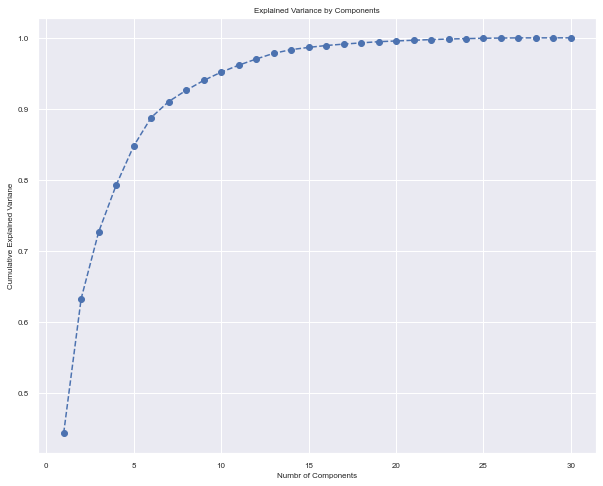

In [10]:
# 2-3: Deciding the number of components 
# Second , plot all the variances we got from above, and plot them
# Use rule of thumb to preserve around 80 % of the variance. So, in this instance, we decide to keep 4 components.
plt.figure(figsize=(10,8))
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('figure', titlesize=8)
plt.plot(range(1,31),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Numbr of Components')
plt.ylabel('Cumulative Explained Variane')

In [11]:
# 2-4: Fit PCA again into our standardized data with n_components = 4
pca = PCA(n_components = 4)
pca.fit(Cancer_std)

PCA(n_components=4)

In [12]:
# 2-45: Check 4 components scores of each patient
pca.transform(Cancer_std)

array([[ 9.19283683,  1.94858307, -1.12316618,  3.633731  ],
       [ 2.3878018 , -3.76817174, -0.5292927 ,  1.11826393],
       [ 5.73389628, -1.0751738 , -0.55174754,  0.91208237],
       ...,
       [ 1.25617928, -1.90229671,  0.56273052, -2.08922699],
       [10.37479406,  1.67201011, -1.87702932, -2.35603122],
       [-5.4752433 , -0.67063679,  1.49044315, -2.29915756]])

In [13]:
scores_pca = pca.transform(Cancer_std)
scores_pca.shape

(569, 4)

## [Step 3] Introducing kmeans

In [14]:
# 3-1: Apply KMeans(). Here we use n_cluster = 2 (Malignant or Benign) 
# Then Fit this pca model into scores_pca 
kmeans_pca = KMeans(n_clusters = 2, init= 'k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [15]:
# 3-2: Create a new dataframe by using the origianl dataframe with addition of PCA scores.
Cancer_df_pca_kmeans = pd.concat([Cancer_df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
Cancer_df_pca_kmeans.columns.values[-4:]=['Component 1', 'Component 2', 'Component 3', 'Component 4']
# Add another column for pca k-means cluster labels to the dataframe
Cancer_df_pca_kmeans['Cancer K-means PCA Cluster']= kmeans_pca.labels_

In [16]:
# 3-3:Give each cluster a label.
Cancer_df_pca_kmeans['Cancer']= Cancer_df_pca_kmeans['Cancer K-means PCA Cluster'].map({
    0:'Malignant', 1:'Benign'})

## [Step 4] Visualize PCA results (varience scores) with KMeans clustering

/Users/Jerry/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


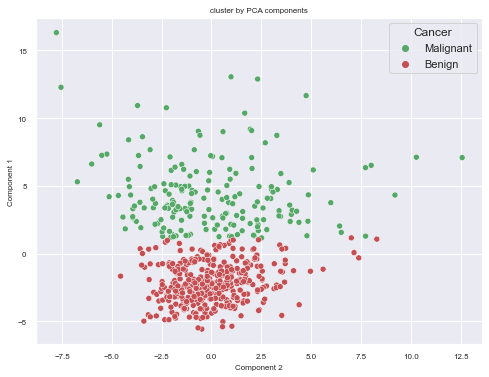

In [17]:
# 4-1: Here we only use component 1 and 2 because this plot is formed by X and Y axis
x_axis = Cancer_df_pca_kmeans['Component 2']
y_axis = Cancer_df_pca_kmeans['Component 1']
plt.figure(figsize=(8,6))
plt.rc('axes', titlesize=8)
plt.rc('axes', labelsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
sns.scatterplot(x_axis, y_axis, hue=Cancer_df_pca_kmeans['Cancer'],palette=['g','r'])
plt.title('cluster by PCA components')
plt.show()

### [AIM 1 & 2] From Plot above we can clearly see each turmor have been identified whehter as Malignant or Benign

## [Step 5] Checking Accuracy rate of PCA model

In [19]:
# 5-1: Now check PCA-K-means Clustering 's accuracy by comparing this result to the real diagnosis result 
# First, bring in origianl diagnosis to the dataframe. 
# If PCA findings equals Origianl diagnosis and we get a value '1'
Cancer_df_pca_kmeans ['Cancer_Diagnosis']=cancer.target
Cancer_df_pca_kmeans['outcome'] = np.where(Cancer_df_pca_kmeans['Cancer K-means PCA Cluster'] == Cancer_df_pca_kmeans['Cancer_Diagnosis'], '1','0')
Cancer_df_pca_kmeans.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst symmetry,worst fractal dimension,Component 1,Component 2,Component 3,Component 4,Cancer K-means PCA Cluster,Cancer,Cancer_Diagnosis,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.4601,0.11890,9.192837,1.948583,-1.123166,3.633731,0,Malignant,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2750,0.08902,2.387802,-3.768172,-0.529293,1.118264,0,Malignant,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.3613,0.08758,5.733896,-1.075174,-0.551748,0.912082,0,Malignant,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6638,0.17300,7.122953,10.275589,-3.232790,0.152547,0,Malignant,0,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.2364,0.07678,3.935302,-1.948072,1.389767,2.940639,0,Malignant,0,1


In [22]:
# 5-2: Checking the comparision results
Cancer_df_pca_kmeans['outcome'].value_counts()

1    518
0     51
Name: outcome, dtype: int64

### 5-3: Calculate accuracy rate. Out of 569 records there are 518 matches
Accurate_rate= (518/569)
Accurate_rate

### [AIM 3] The accuracy rate is 91% (2 d.p.)